# Iris Training

Iris flower data set,


Input:
    
![](http://s5047.pcdn.co/wp-content/uploads/2015/04/iris_petal_sepal.png)

Output:
    
![](https://miro.medium.com/fit/c/1838/551/0*Uw37vrrKzeEWahdB)

In [18]:
from sklearn import datasets
from pandas import *
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from numpy import array

from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from IPython.display import HTML, display
from tabulate import tabulate

def table(df): display(HTML(tabulate(df, tablefmt='html', headers='keys', showindex=False)))

In [2]:
# IRIS
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [12]:
# IRIS TRAINING OUTPUT
data = [list(s)+[iris.target_names[iris.target[i]]] for i,s in enumerate(iris.data)]
dataset = DataFrame(data, columns=iris.feature_names+['class'])
table(dataset)

sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
5.1,3.5,1.4,0.2,setosa
4.9,3,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
4.6,3.4,1.4,0.3,setosa
5,3.4,1.5,0.2,setosa
4.4,2.9,1.4,0.2,setosa
4.9,3.1,1.5,0.1,setosa


In [4]:
dataset.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
dataset.groupby('class').size()

class
setosa        50
versicolor    50
virginica     50
dtype: int64

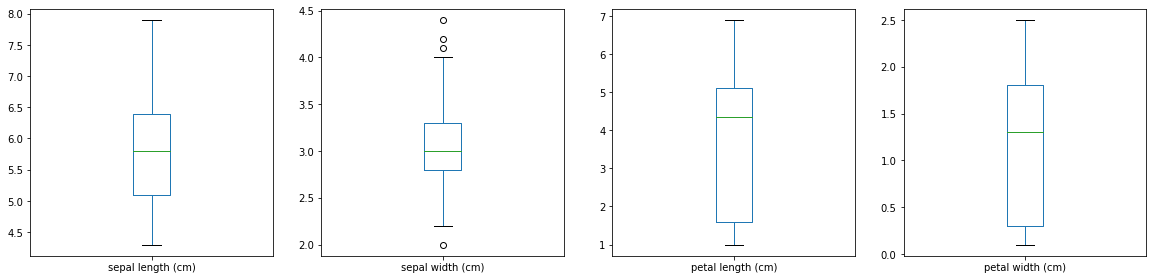

In [17]:
dataset.plot(kind='box', subplots=True, layout=(2,4), figsize=(20,10), sharex=False, sharey=False)
plt.show()

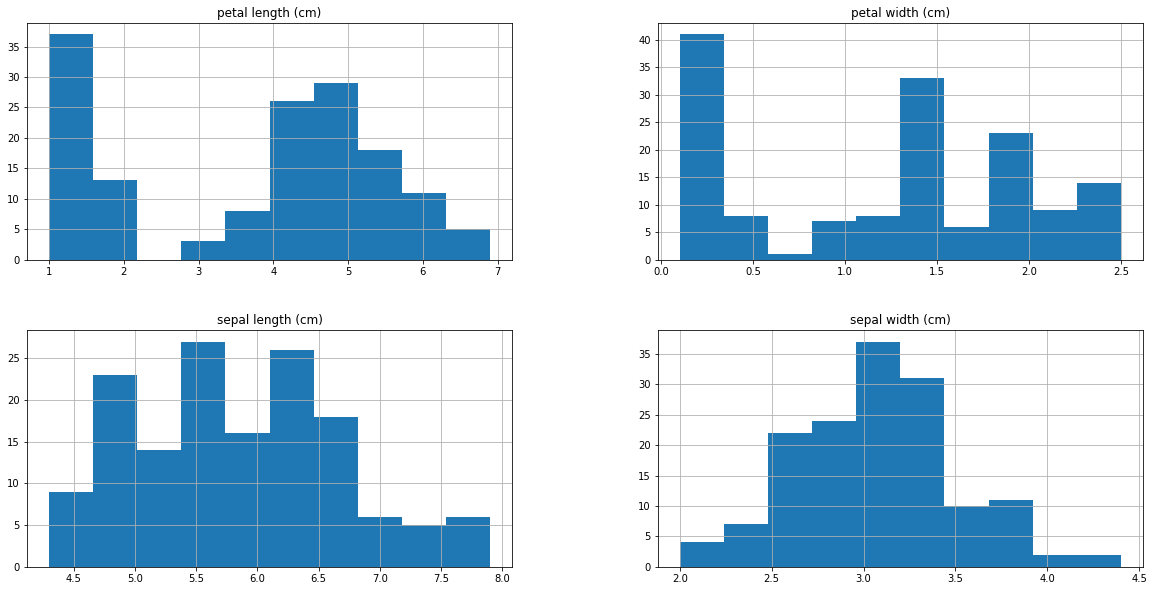

In [19]:
# histograms
dataset.hist(figsize=(20,10))
plt.show()

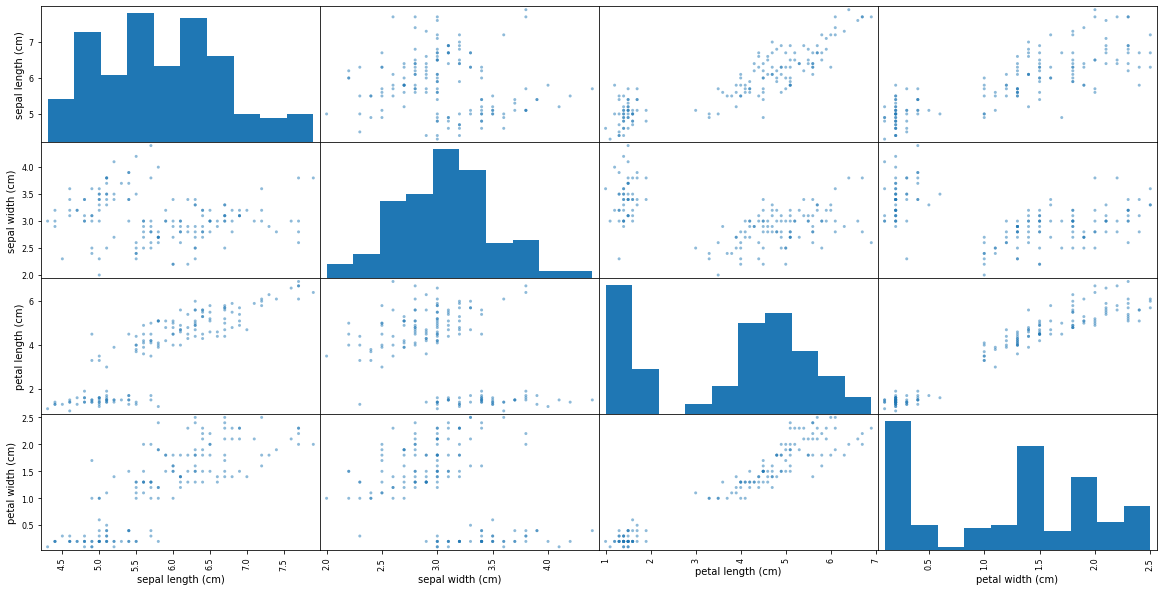

In [20]:
scatter_matrix(dataset, figsize=(20,10))
plt.show()

In [21]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
Y = array[:,4]


Training Size & Classifier comparison at seed = 1


Train_size (%),LinearDiscriminantAnalysis,KNeighborsClassifier,DecisionTreeClassifier,GaussianNB
0.1,0.933333,0.948148,0.918519,0.948148
0.2,0.966667,0.933333,0.908333,0.933333
0.3,0.980952,0.980952,0.933333,0.961905
0.4,0.977778,0.977778,0.922222,0.966667
0.5,0.986667,0.946667,0.973333,0.96
0.6,0.983333,0.983333,0.966667,0.95
0.7,1,0.977778,0.955556,0.933333
0.8,1,1,0.966667,0.966667
0.9,1,1,1,1


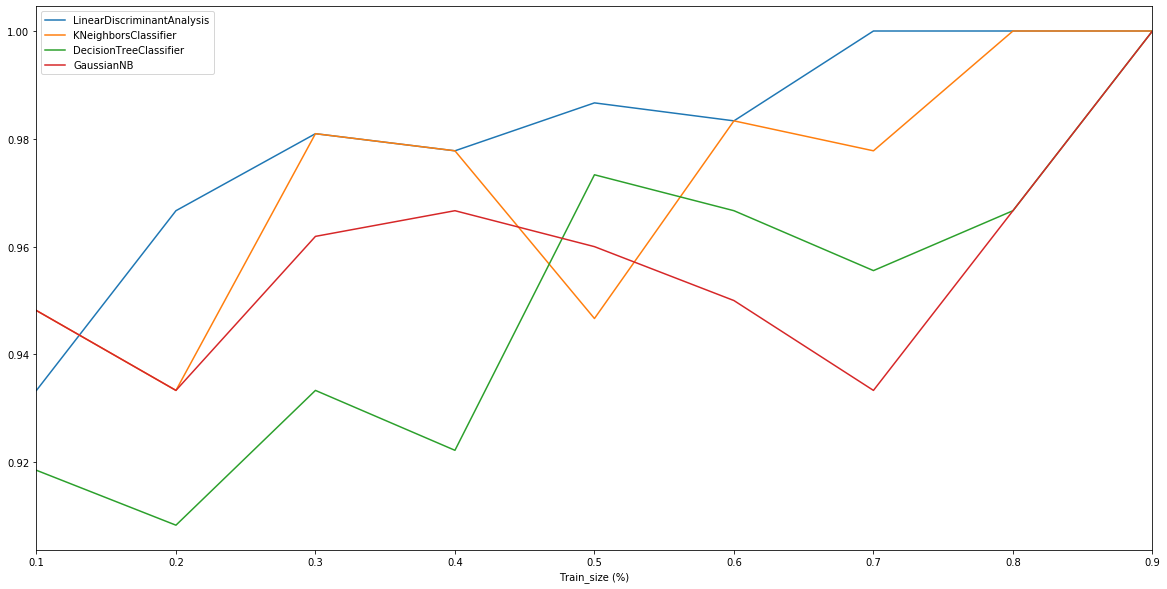

In [23]:
# Make predictions on validation dataset

seed = 1

def do_training(train_size, classifierC):
    X_train, X_validation, Y_train, Y_validation = \
        model_selection.train_test_split(X, Y, \
        train_size=train_size, random_state=seed)
    classifier = classifierC()
    classifier.fit(X_train, Y_train)
    p = classifier.predict(X_validation)
    return accuracy_score(Y_validation, p)

trainset = [[
            s/10, 
            do_training(s/10, LinearDiscriminantAnalysis),
            do_training(s/10, KNeighborsClassifier),
            do_training(s/10, DecisionTreeClassifier),
            do_training(s/10, GaussianNB),
            ] for s in range(1,10,1)]
print("Training Size & Classifier comparison at seed =", seed)

trainframe = DataFrame(trainset, columns=["Train_size (%)", "LinearDiscriminantAnalysis", "KNeighborsClassifier", "DecisionTreeClassifier", "GaussianNB"])

trainframe.plot(x ='Train_size (%)', figsize=(20,10))
table(trainframe)